# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
haberman = pd.read_csv("haberman.csv")


In [3]:
print(haberman.shape) #prints the rows and columns in the data set

(306, 4)


In [4]:
print(haberman.columns) #prints the column names

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
haberman["status"].value_counts()
#in status column we are finding number of 1s and 2s

1    225
2     81
Name: status, dtype: int64

# (3.2) 2-D Scatter Plot

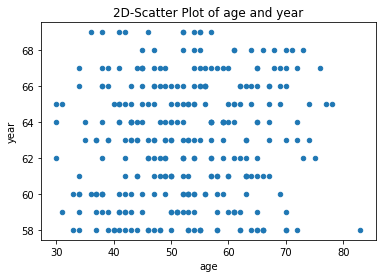

In [6]:
#we have three parameters age,year and nodes to determine status
#we will perform the 2D scatter plot
haberman.plot(kind='scatter', x='age', y='year')
#we cannot make much sense out of this data
plt.xlabel("age")
plt.ylabel("year")
plt.title("2D-Scatter Plot of age and year")
plt.show()

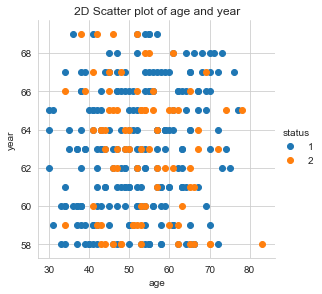

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("2D Scatter plot of age and year")
plt.show();


# Observation(s):
1. Now we can distinguish between status1(pateint survived more than 5 years) and status2(patient died within 5 years)
2. Seperating status1 from status2 is very difficult as they are overlapping considerably.
3. Now let us draw multiple scatter plots using all parameters using pair plots so we can gather more insights.


#  (3.3) Pair-plot

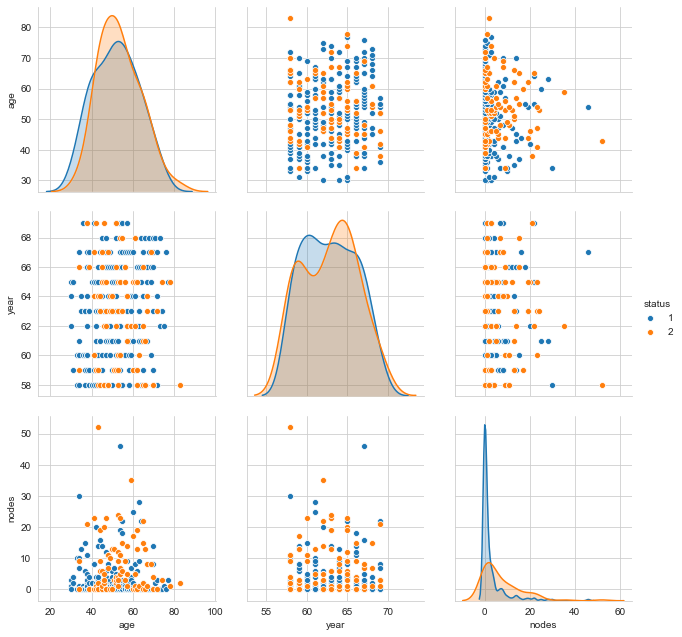

In [8]:
plt.close();
sns.set_style("whitegrid");

sns.pairplot(haberman, hue="status",vars = ["age","year","nodes"],height =3);

plt.show()
#The diagonal elements are pdfs.
#the total number of pair plots that we get are 4C2 = 6
#the upper triangle of the matrix is similar to lower triangle of the matrix


# Observations

1.There is a lot of overlapping in 2D pair plots.

2.Not much insight can be drawn from 2D pair plots because in all the plots the data points are overlapping.

3.Let us try the 1D scatter plot and gain some more information on the patterns.

# (3.4) Histogram, PDF, CDF

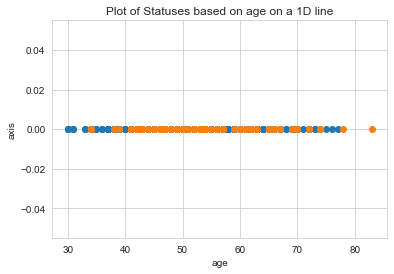

In [9]:
import numpy as np
haberman_status1 = haberman.loc[haberman["status"] == 1];
haberman_status2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_status1["age"], np.zeros_like(haberman_status1['age']), 'o')
plt.plot(haberman_status2["age"], np.zeros_like(haberman_status2['age']), 'o')
plt.xlabel("age")
plt.ylabel("axis")
plt.title("Plot of Statuses based on age on a 1D line")

plt.show()

# Observation(s):
1. In this 1-D scatter plot it is very hard to make conclusions because the points are highly overlapping.
2. Let us look at the histograms inorder to make some conclusions.

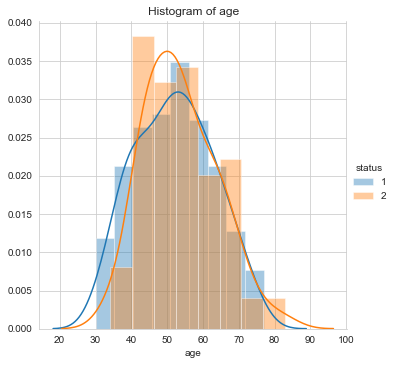

In [10]:
#now let us draw histograms of all the parameters(i.e age,year,nodes)
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram of age")
plt.show();




# Observation(s):
1. We can conclude that people whose age is below 34 fall under status1 and people whose age is above 75 fall in status2 category.
2. When age is in between 34 to 40 it is more likely that the person will belong to status1 rather than status2.
3. From age 40 to 68 there are not good predictions that we can make from this plot.
4. From age 70 to 75 it is more probable that a person will belong to status1 than status2.


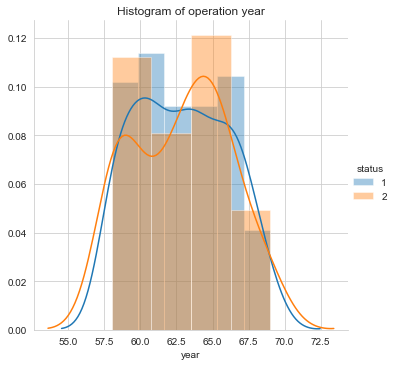

In [11]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram of operation year")
plt.show();


# Observation(s):
1. This a terrible plot because almost all the values are overlapping and it is very hard to conclude which people fall in a particular status based on operation year.

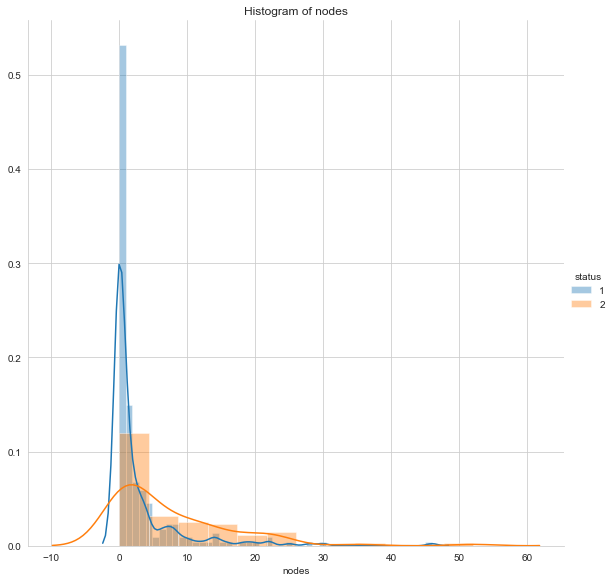

In [12]:
sns.FacetGrid(haberman, hue="status", height=8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram of nodes")
plt.show();


# Observation(s):
1. This a very good plot which can distinguish between people who belong to status1 and status2.
2. People who have  (0 to 2) nodes and 6 nodes have very high probablility of being in status1 than status 2.
3. When the number of nodes are (2 to 5) and (7 to 28) then it is status2.




[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


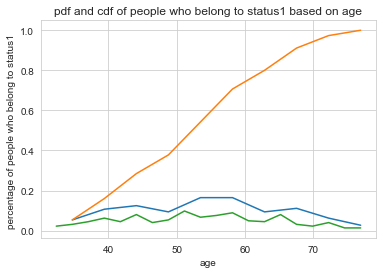

In [13]:
#Let us plot the cdf
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_status1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.ylabel("percentage of people who belong to status1 ")
plt.xlabel("age")
plt.title("pdf and cdf of people who belong to status1 based on age")

plt.show();

# Observation(s):
1. We can conclude from cdf that 90percentile(approx) of the people with age less than 70 fall in the category of status1.
2. The green line indicates the pdf with bin = 20 and blue  line also indicates the pdf but bin = 10.

# Organised Plots of PDF and CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


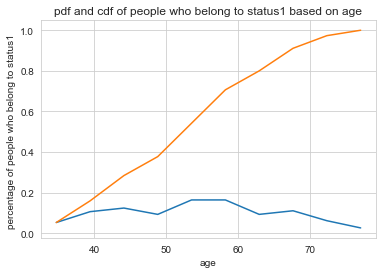

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


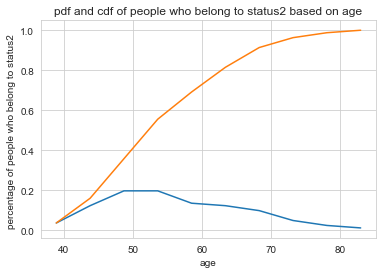

In [14]:
#plot of pdfs and cdfs of status 1  and status 2 using age as parameter
#status1 using age as main parameter 
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("percentage of people who belong to status1 ")
plt.xlabel("age")
plt.title("pdf and cdf of people who belong to status1 based on age")
plt.show()

#status2 using age as parameter
counts, bin_edges = np.histogram(haberman_status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.ylabel("percentage of people who belong to status2 ")
plt.xlabel("age")
plt.title("pdf and cdf of people who belong to status2 based on age")
plt.show()



# Observation(s):
1. We can conclude from cdf that 78percentile(approx) of the people with age less than 60 fall in the category of status1.
2. We can conclude from cdf that 75percentile(approx) of the people with age less than 60 fall in the category of status2.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


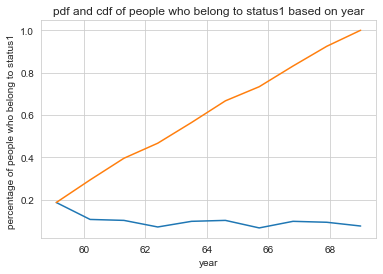

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


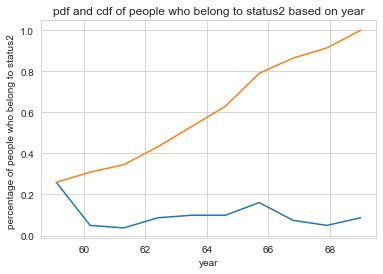

In [15]:
#using op_year as paramter
counts, bin_edges = np.histogram(haberman_status1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("percentage of people who belong to status1 ")
plt.xlabel("year")
plt.title("pdf and cdf of people who belong to status1 based on year")
plt.show()

counts, bin_edges = np.histogram(haberman_status2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.ylabel("percentage of people who belong to status2 ")
plt.xlabel("year")
plt.title("pdf and cdf of people who belong to status2 based on year")
plt.show()

# Observation(s):
1. We can conclude from cdf that 45percentile(approx) of the people with operation year less than 62 fall in the category of status1.
2. We can conclude from cdf that 40percentile(approx) of the people with operation year less than 62 fall in the category of status2.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


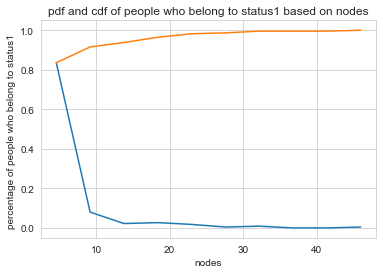

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


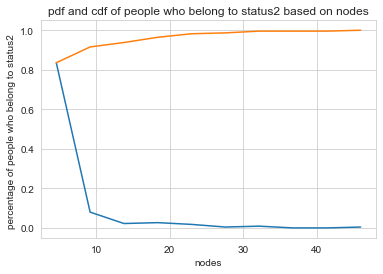

In [16]:
#using nodes as paramter
counts, bin_edges = np.histogram(haberman_status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("percentage of people who belong to status1 ")
plt.xlabel("nodes")
plt.title("pdf and cdf of people who belong to status1 based on nodes")
plt.show()

counts, bin_edges = np.histogram(haberman_status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("percentage of people who belong to status2 ")
plt.xlabel("nodes")
plt.title("pdf and cdf of people who belong to status2 based on nodes")
plt.show()

# Observation(s):
1. We can conclude from cdf that 90percentile(approx) of the people with nodes less than 15 fall in the category of status1.
2. We can conclude from cdf that 95percentile(approx) of the people with operation year less than 15 fall in the category of status2.

# (3.5) Mean, Variance and Std-dev

In [17]:
#print mean
print("Means:")
print("Mean of status1 based on age: \n",np.mean(haberman_status1["age"]))
#Mean with an outlier.
print("Mean with outlier of status1 based on age: \n",np.mean(np.append(haberman_status1["age"],300)))
print("Mean of status2 based on age: \n",np.mean(haberman_status2["age"]))


print("Mean of status1 based on age: \n",np.mean(haberman_status1["age"]))
print("Mean of status1 based on op_year: \n",np.mean(haberman_status1["year"]))
print("Mean of status1 based on nodes: \n",np.mean(haberman_status1["nodes"]))

print("Mean of status2 based on age: \n",np.mean(haberman_status2["age"]))
print("Mean of status2 based on year: \n",np.mean(haberman_status2["year"]))
print("Mean of status2 based on nodes: \n",np.mean(haberman_status2["nodes"]))


Means:
Mean of status1 based on age: 
 52.01777777777778
Mean with outlier of status1 based on age: 
 53.11504424778761
Mean of status2 based on age: 
 53.67901234567901
Mean of status1 based on age: 
 52.01777777777778
Mean of status1 based on op_year: 
 62.86222222222222
Mean of status1 based on nodes: 
 2.7911111111111113
Mean of status2 based on age: 
 53.67901234567901
Mean of status2 based on year: 
 62.82716049382716
Mean of status2 based on nodes: 
 7.45679012345679


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [19]:
#printing median and percentiles
print("Medians:")
print("Median of status1 based on age: \n",np.median(haberman_status1["age"]))
#Mean with an outlier.
print("Median with outlier of status1 based on age: \n",np.median(np.append(haberman_status1["age"],300)))
print("Median of status2 based on age: \n",np.median(haberman_status2["age"]))


print("Median of status1 based on age: \n",np.median(haberman_status1["age"]))
print("Median of status1 based on op_year: \n",np.median(haberman_status1["year"]))
print("Median of status1 based on nodes: \n",np.median(haberman_status1["nodes"]))

print("Median of status2 based on age: \n",np.median(haberman_status2["age"]))
print("Median of status2 based on op_year: \n",np.median(haberman_status2["year"]))
print("Median of status2 based on node: \n",np.median(haberman_status2["nodes"]))

Medians:
Median of status1 based on age: 
 52.0
Median with outlier of status1 based on age: 
 52.0
Median of status2 based on age: 
 53.0
Median of status1 based on age: 
 52.0
Median of status1 based on op_year: 
 63.0
Median of status1 based on nodes: 
 0.0
Median of status2 based on age: 
 53.0
Median of status2 based on op_year: 
 63.0
Median of status2 based on node: 
 4.0


# Observation:
The median does not change that much compared to mean when there is an outlier present.So in case of outliers , it is best to use medians.


In [20]:
print("\n Quantiles:")
print(np.percentile(haberman_status1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["age"],np.arange(0, 100, 25)))

print(np.percentile(haberman_status1["year"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["year"],np.arange(0, 100, 25)))

print(np.percentile(haberman_status1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["nodes"],np.arange(0, 100, 25)))


 Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [21]:
print("\n 90thperrcentiles:")
print(np.percentile(haberman_status1["age"],90))
print(np.percentile(haberman_status2["age"],90))

print(np.percentile(haberman_status1["year"],90))
print(np.percentile(haberman_status2["year"],90))

print(np.percentile(haberman_status1["nodes"],90))
print(np.percentile(haberman_status2["nodes"],90))


 90thperrcentiles:
67.0
67.0
67.0
67.0
8.0
20.0


In [22]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_status1["age"]))
print(robust.mad(haberman_status2["age"]))



Median Absolute Deviation
13.343419966550417
11.860817748044816


In [23]:
print(robust.mad(haberman_status1["year"]))
print(robust.mad(haberman_status2["year"]))

4.447806655516806
4.447806655516806


In [24]:
print(robust.mad(haberman_status1["nodes"]))
print(robust.mad(haberman_status2["nodes"]))

0.0
5.930408874022408


# (3.7) Box plot and Whiskers

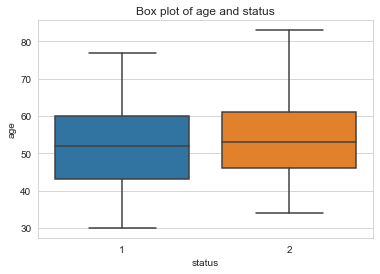

In [25]:
sns.boxplot(x='status',y="age", data=haberman)
plt.title("Box plot of age and status")

plt.show()


# Observation(s):
1. The box plot has quantiles as it gives us information about them.
2. Consider the blue box,we can say the 25th,50th and 75th percentiles based on age instantly.
3. We can also find the number of status2 values when we describe the status1 values at a particular percentile.
4. Whiskers are the ends of blue and yellow box plots which is simply a horizontal line.

# (3.8) Violin plots

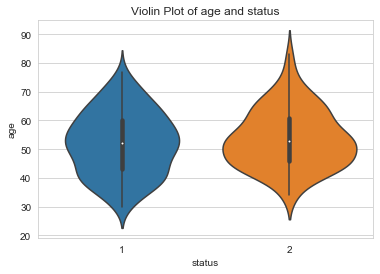

In [26]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("Violin Plot of age and status")
plt.show()

# Observation(s):
1. It is a mix of pdf or histogram and box plot so it is highly informative.
2. The pdfs are plotted on the either sides of the box plot to easy comparision and measuring.

# (3.9)Multivariate Analysis(Contour Plots)

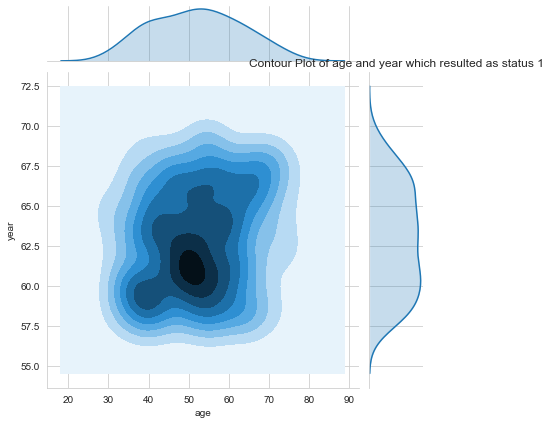

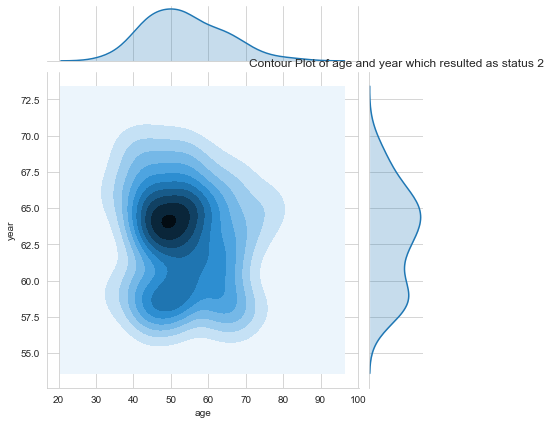

In [27]:
#contour plot of op_year and age
sns.jointplot(x="age", y="year", data=haberman_status1, kind="kde")
plt.title("Contour Plot of age and year which resulted as status 1")
plt.show();

sns.jointplot(x="age", y="year", data=haberman_status2, kind="kde")
plt.title("Contour Plot of age and year which resulted as status 2")
plt.show();

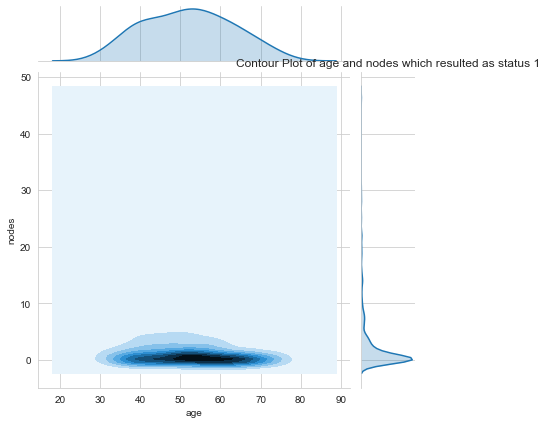

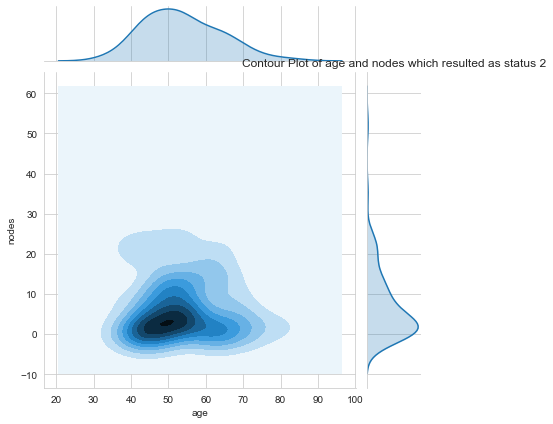

In [28]:
#contour plot of age and nodes
sns.jointplot(x="age", y="nodes", data=haberman_status1, kind="kde");
plt.title("Contour Plot of age and nodes which resulted as status 1")
plt.show();

sns.jointplot(x="age", y="nodes", data=haberman_status2, kind="kde");
plt.title("Contour Plot of age and nodes which resulted as status 2")
plt.show();

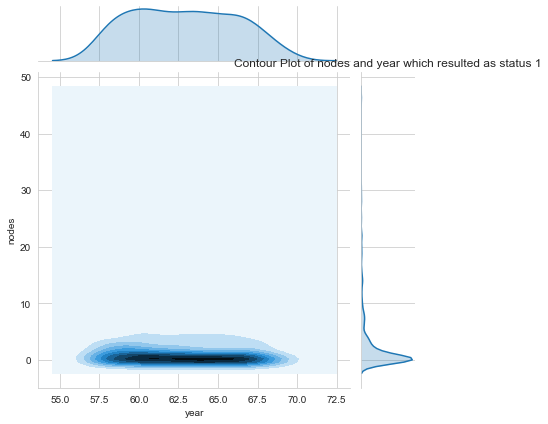

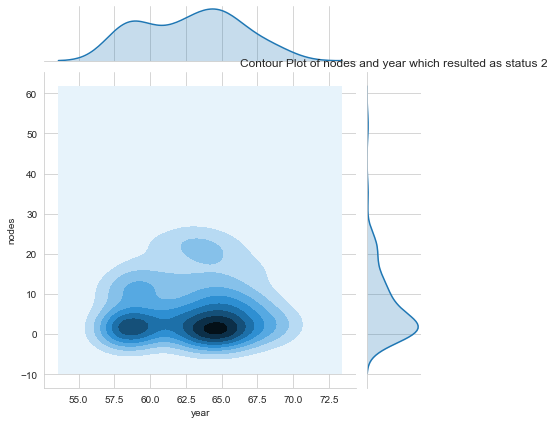

In [29]:
#contour plot of op_year and nodes
sns.jointplot(x="year", y="nodes", data=haberman_status1, kind="kde");
plt.title("Contour Plot of nodes and year which resulted as status 1")
plt.show();

sns.jointplot(x="year", y="nodes", data=haberman_status2, kind="kde");
plt.title("Contour Plot of nodes and year which resulted as status 2")
plt.show();

# Observations:
1. Simliar to 1-D histograms(for one parameter), the contour plots are like 2-D histograms(for two parameters).
2. The most dark region has the most points of both Y and X axes.
3. As we move away from the most dark region we have lesser number of points from X and Y axes